In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("customer_seg")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [3]:

df.shape


(2627, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
df.describe()


,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [13]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [7]:
df.isnull().sum()


ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [8]:
df = df.dropna()


In [9]:
df.dropna

<bound method DataFrame.dropna of           ID  Gender Ever_Married  Age Graduated     Profession  \
0     458989  Female          Yes   36       Yes       Engineer   
1     458994    Male          Yes   37       Yes     Healthcare   
3     459000    Male          Yes   59        No      Executive   
5     459003    Male          Yes   47       Yes         Doctor   
6     459005    Male          Yes   61       Yes         Doctor   
...      ...     ...          ...  ...       ...            ...   
2621  467950  Female           No   35       Yes  Entertainment   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 0.0            Low          1.0  Cat_6  
1                 8.0        Average       

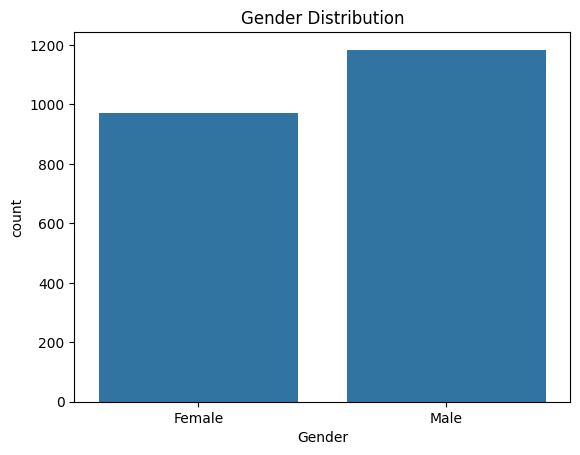

In [10]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


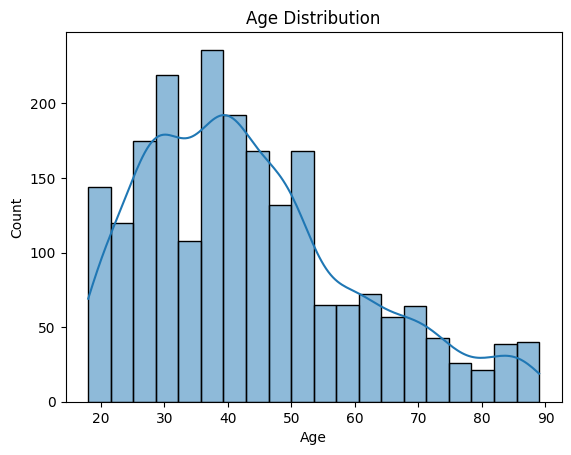

In [11]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


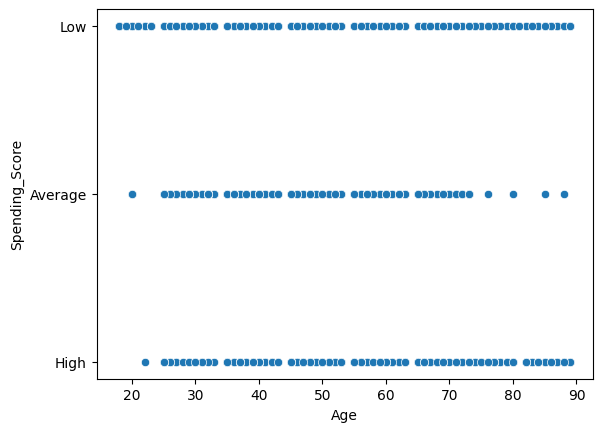

In [14]:
sns.scatterplot(x='Age', y='Spending_Score', data=df)
plt.show()



In [15]:
df.drop('ID', axis=1, inplace=True)


In [16]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)


/home/intellect/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/intellect/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/intellect/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/intellect/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

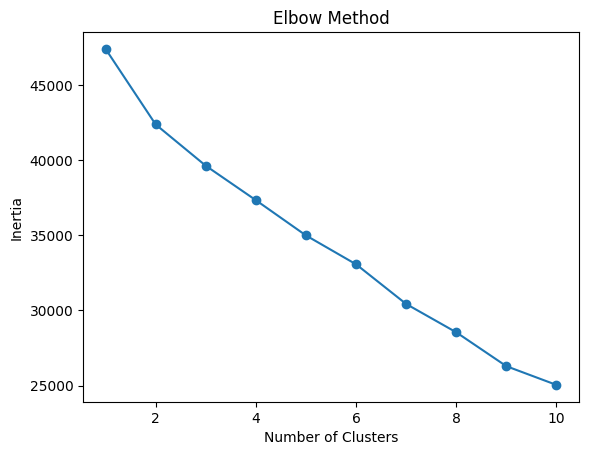

In [18]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


/home/intellect/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
df['Cluster'] = clusters


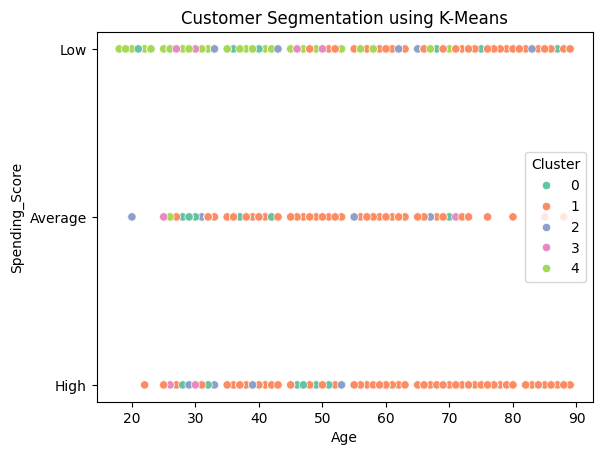

In [21]:
sns.scatterplot(
    x='Age',
    y='Spending_Score',
    hue='Cluster',
    palette='Set2',
    data=df
)
plt.title("Customer Segmentation using K-Means")
plt.show()


In [25]:
df.groupby('Cluster').mean(numeric_only=True)



,Age,Work_Experience,Family_Size
Cluster,,,
0,38.473354,2.147335,3.579937
1,57.080688,1.842593,2.615079
2,38.231343,2.682836,2.958955
3,36.241379,2.689655,3.586207
4,34.158273,3.434532,2.565468


In [26]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.13380656057732188


In [27]:
%%writefile requirements.txt
streamlit
scikit-learn
numpy
joblib

Writing requirements.txt
